In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
# create the path for the file

myPath = os.path.join('/Users', 'Bryan', 'Documents', 'Programming', 'time_series_forecasting_with_python', 'UDEMY_TSA_FINAL', 'Data')

print(myPath)

os.chdir(myPath)

/Users/Bryan/Documents/Programming/time_series_forecasting_with_python/UDEMY_TSA_FINAL/Data


In [3]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

# set index frequency to monthly start
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# end point in slice not included
# using .loc would use the date ['date']

train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

In [11]:
test_predictions = fitted_model.forecast(36)

In [12]:
test_predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379218
1958-07-01    502.248555
1958-08-01    490.986946
1958-09-01    424.051080
1958-10-01    365.391637
1958-11-01    318.392247
1958-12-01    360.320760
1959-01-01    369.905595
1959-02-01    359.903247
1959-03-01    422.128280
1959-04-01    412.508717
1959-05-01    421.370055
1959-06-01    492.003333
1959-07-01    545.035929
1959-08-01    532.814925
1959-09-01    460.176683
1959-10-01    396.519947
1959-11-01    345.516603
1959-12-01    391.017074
1960-01-01    401.418457
1960-02-01    390.563992
1960-03-01    458.090078
1960-04-01    447.651008
1960-05-01    457.267258
1960-06-01    533.917900
1960-07-01    591.468430
1960-08-01    578.206298
1960-09-01    499.379886
1960-10-01    430.300128
1960-11-01    374.951726
1960-12-01    424.328457
1961-01-01    435.615950
Freq: MS, dtype: float64

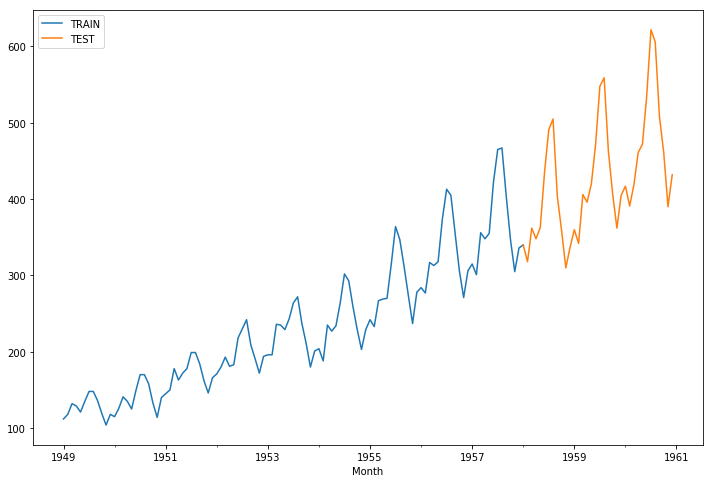

In [14]:
# plot everything
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')

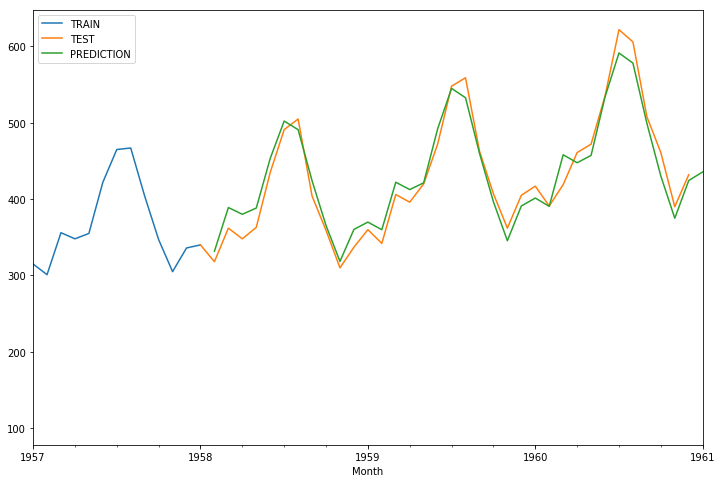

In [19]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1957-01-01','1961-01-01'])

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
mean_absolute_error(test_data, test_predictions)


46.30290455233973

In [23]:
# compare RMSE to standard deviation of actual data

np.sqrt(mean_squared_error(test_data, test_predictions))

55.45564413631833

In [24]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul',seasonal_periods=12).fit()

In [25]:
forecast_predictions = final_model.forecast(36)

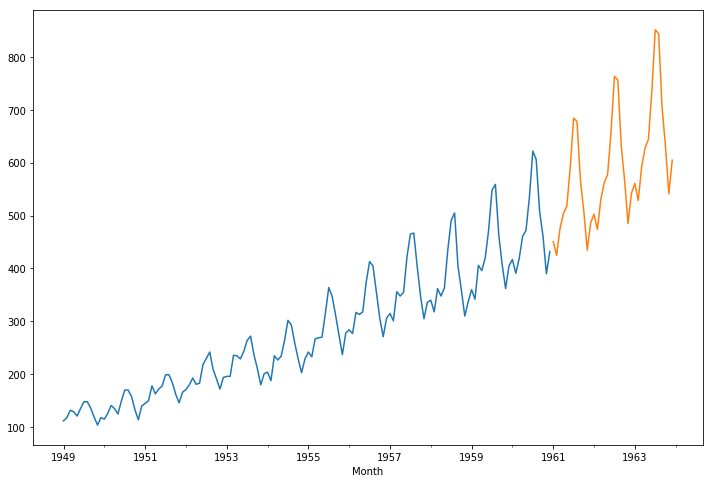

In [27]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [30]:
df2 = pd.read_csv('samples.csv', index_col=0, parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


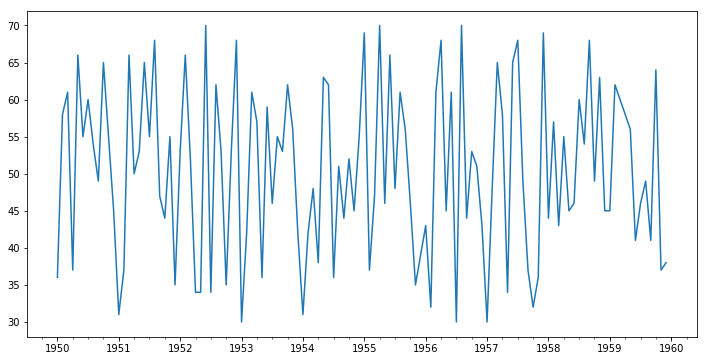

In [31]:
# stationary data

df2['a'].plot(figsize=(12,6))

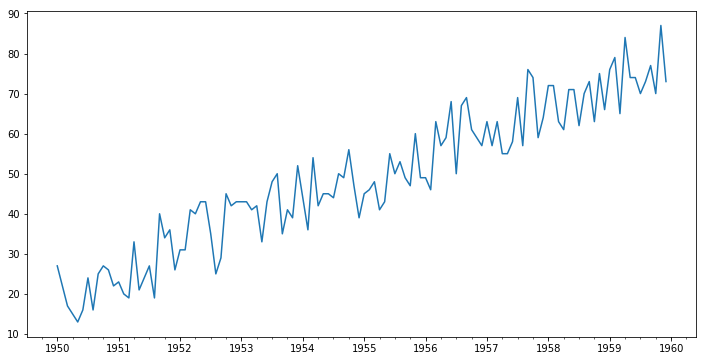

In [32]:
# non-stationary data set

df2['b'].plot(figsize=(12,6))

In [33]:
from statsmodels.tsa.statespace.tools import diff

In [34]:
# take the first difference manually

df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
1950-07-01     8.0
1950-08-01    -8.0
1950-09-01     9.0
1950-10-01     2.0
1950-11-01    -1.0
1950-12-01    -4.0
1951-01-01     1.0
1951-02-01    -3.0
1951-03-01    -1.0
1951-04-01    14.0
1951-05-01   -12.0
1951-06-01     3.0
1951-07-01     3.0
1951-08-01    -8.0
1951-09-01    21.0
1951-10-01    -6.0
1951-11-01     2.0
1951-12-01   -10.0
1952-01-01     5.0
1952-02-01     0.0
1952-03-01    10.0
1952-04-01    -1.0
1952-05-01     3.0
1952-06-01     0.0
              ... 
1957-07-01    11.0
1957-08-01   -12.0
1957-09-01    19.0
1957-10-01    -2.0
1957-11-01   -15.0
1957-12-01     5.0
1958-01-01     8.0
1958-02-01     0.0
1958-03-01    -9.0
1958-04-01    -2.0
1958-05-01    10.0
1958-06-01     0.0
1958-07-01    -9.0
1958-08-01     8.0
1958-09-01     3.0
1958-10-01   -10.0
1958-11-01    12.0
1958-12-01    -9.0
1959-01-01    10.0
1959-02-01     3.0
1959-03-01   -14.0
1959-04-01  

In [35]:
# stats models first difference

diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
1950-07-01     8.0
1950-08-01    -8.0
1950-09-01     9.0
1950-10-01     2.0
1950-11-01    -1.0
1950-12-01    -4.0
1951-01-01     1.0
1951-02-01    -3.0
1951-03-01    -1.0
1951-04-01    14.0
1951-05-01   -12.0
1951-06-01     3.0
1951-07-01     3.0
1951-08-01    -8.0
1951-09-01    21.0
1951-10-01    -6.0
1951-11-01     2.0
1951-12-01   -10.0
1952-01-01     5.0
1952-02-01     0.0
1952-03-01    10.0
1952-04-01    -1.0
1952-05-01     3.0
1952-06-01     0.0
1952-07-01    -8.0
              ... 
1957-07-01    11.0
1957-08-01   -12.0
1957-09-01    19.0
1957-10-01    -2.0
1957-11-01   -15.0
1957-12-01     5.0
1958-01-01     8.0
1958-02-01     0.0
1958-03-01    -9.0
1958-04-01    -2.0
1958-05-01    10.0
1958-06-01     0.0
1958-07-01    -9.0
1958-08-01     8.0
1958-09-01     3.0
1958-10-01   -10.0
1958-11-01    12.0
1958-12-01    -9.0
1959-01-01    10.0
1959-02-01     3.0
1959-03-01   -14.0
1959-04-01  

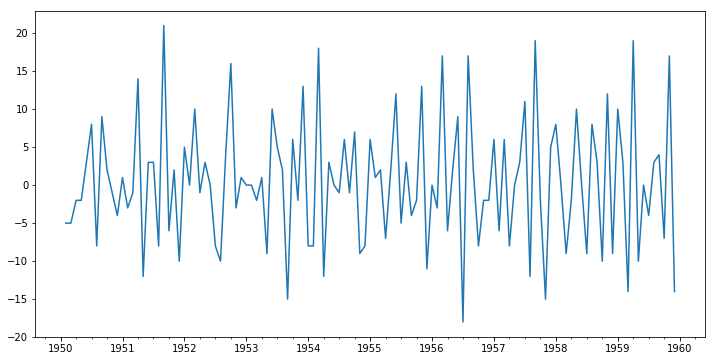

In [36]:
# use differencing to make it stationary

diff(df2['b'], k_diff=1).plot(figsize=(12,6))